In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

OUT_DIR = './CNN_out'
img_shape = (28, 28, 1)
epochs = 100000
batch_size = 128
noise = 100
sample_interval = 100

(X_train, Y_train), (_, _) = mnist.load_data()
MY_NUMBER=7
X_train = X_train[Y_train == MY_NUMBER]
print(X_train.shape)

X_train = X_train / 127.5 - 1
X_train = np.expand_dims(X_train, axis=3)
print(X_train.shape)

generator = Sequential()
generator.add(Dense(256*7*7, input_dim=noise))
generator.add(Reshape((7, 7, 256)))
generator.add(Conv2DTranspose(128, kernel_size=3,
            strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(64, kernel_size=3,
            strides=1, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(1, kernel_size=3,
                    strides=2, padding='same'))
generator.add(Activation('tanh'))

discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3,
        strides=2, padding='same', input_shape=img_shape))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Conv2D(64, kernel_size=3,
        strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Conv2D(128, kernel_size=3,
        strides=2, padding='same'))
discriminator.add(LeakyReLU(alpha=0.01))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.summary()

discriminator.compile(loss='binary_crossentropy',
                      optimizer='adam', metrics=['accuracy'])
discriminator.trainable=False

gan_model = Sequential()
gan_model.add(generator)
gan_model.add(discriminator)
gan_model.summary()
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

real = np.ones((batch_size, 1))

fake = np.zeros((batch_size, 1))




11501568/11490434 [==============================] - 0s 0us/step
(6265, 28, 28)
(6265, 28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4, 4, 128)         0         
                      

In [ ]:
from tensorflow.keras.models import *
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_imgs = X_train[idx]

    z = np.random.normal(0, 1, (batch_size, noise))
    fake_imgs = generator.predict(z)

    d_hist_real = discriminator.train_on_batch(real_imgs, real)
    d_hist_fake = discriminator.train_on_batch(fake_imgs, fake)

    d_loss, d_acc = 0.5 * np.add(d_hist_real, d_hist_fake)
    discriminator.trainable=False

    z = np.random.normal(0, 1, (batch_size, noise))
    gan_hist = gan_model.train_on_batch(z, real)

    if epoch % sample_interval == 0:
        print('%d [D loss: %f, acc.: %.2f%%] [G loss: %f]'%(
            epoch, d_loss, d_acc * 100, gan_hist))
        row = col = 4
        z = np.random.normal(0, 1, (row * col, noise))
        fake_imgs = generator.predict(z)
        fake_imgs = 0.5 * fake_imgs + 0.5
        _, axs = plt.subplots(row, col, figsize=(row, col),
                             sharey=True, sharex=True)
        cont = 0
        for i in range(row):
            for j in range(col):
                axs[i, j].imshow(fake_imgs[cont, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cont += 1
        plt.show()
        plt.close()
        generator.save('/content/drive/MyDrive/CNN_output/generator_mnist_{}.h5'.format(MY_NUMBER))
        


In [ ]:
number_GAN_models = []
for i in range(10):
  try:
    number_GAN_models.append(load_model('./models/generator_mnist{}.h5'.format(i)))
  except:
    number_GAN_models.append(load_model('./models/generator_mnist_0.h5'))


In [ ]:
four_digit_number = '1339'
numbers = list(four_digit_number)
print(numbers)

In [ ]:
imgs=[]
for i in numbers:
  i = int(i)
  z = np.random.normal(0,1,(1,100))
  fake_img = number_GAN_models[i].predict(z)
  fake_img = 0.5*fake_img + 0.5
  imgs.append(fake_img.reshape(28,28))
  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
z = np.random.normal(0,1,(1,100))
fake_img = generator.predict(z)
fake_img = 0.5*fake_img + 0.5
print(fake_img.shape)

(1, 28, 28, 1)


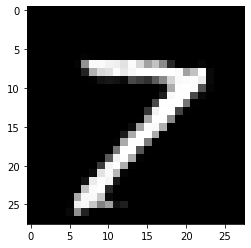

In [8]:
plt.gray()
plt.imshow(fake_img.reshape(28,28))
plt.show()

In [9]:
generator.save('/content/drive/MyDrive/CNN_output/generator_mnist_7.h5')